# Baldur's Gate 3 SEO Analysis: Insights and Recommendations
## <ins>Objective</ins>
- Analyze the processed data to generate actionable SEO insights.
- Compare the strategies employed by different guide websites based on their use of keywords, meta tags, and content structure.
- Provide recommendations for optimizing SEO for Baldur's Gate 3-related content.
## <ins>Workflow</ins>
1. Load the fully processed data.
2. Perform comparative analysis across websites:
   - Keyword distributions.
   - Meta tag effectiveness (lengths, keyword usage).
   - Content richness (word count, readability).
3. Identify trends and gaps in SEO strategies.
4. Provide actionable recommendations for improving SEO.
## <ins>Imports</ins>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

## <ins>Load Data</ins>

In [2]:
# Load the fully processed data
data_filepath = "data/fully_processed_data.pkl"
seo_dataframe = pd.read_pickle(data_filepath)

## <ins>Step 2: Comparative Keyword Analysis</ins>
Compare the keyword usage across different websites by analyzing the `Content`, `Meta_Title`, and `Meta_Description` fields. Generate word clouds and frequency distributions.

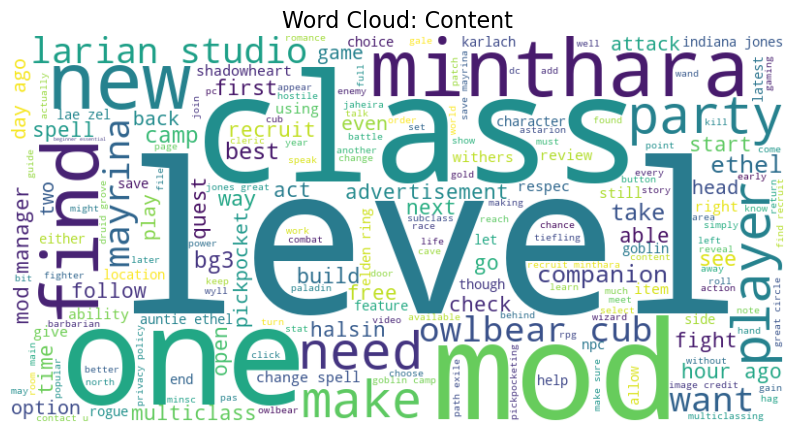

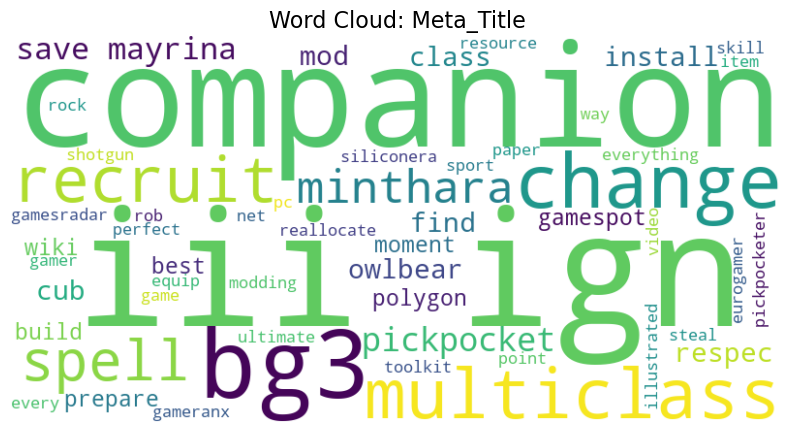

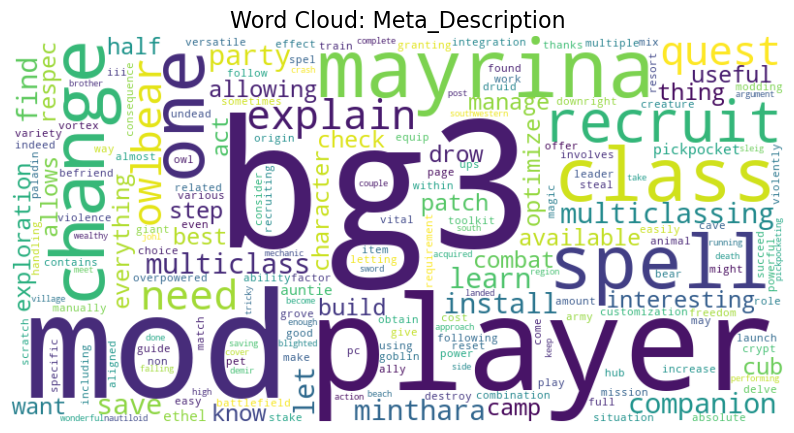

In [3]:
# Generate word clouds for each column
def generate_word_cloud(column, title):
    text = " ".join(seo_dataframe[column].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()

generate_word_cloud("Content", "Word Cloud: Content")
generate_word_cloud("Meta_Title", "Word Cloud: Meta_Title")
generate_word_cloud("Meta_Description", "Word Cloud: Meta_Description")

## <ins>Step 3: Analyze Meta Tag Effectiveness</ins>

Evaluate the meta tag lengths and trends to understand how well they align with SEO best practices. For instance:
- `Meta_Title` should ideally be 50–60 characters.
- `Meta_Description` should ideally be 150–160 characters.


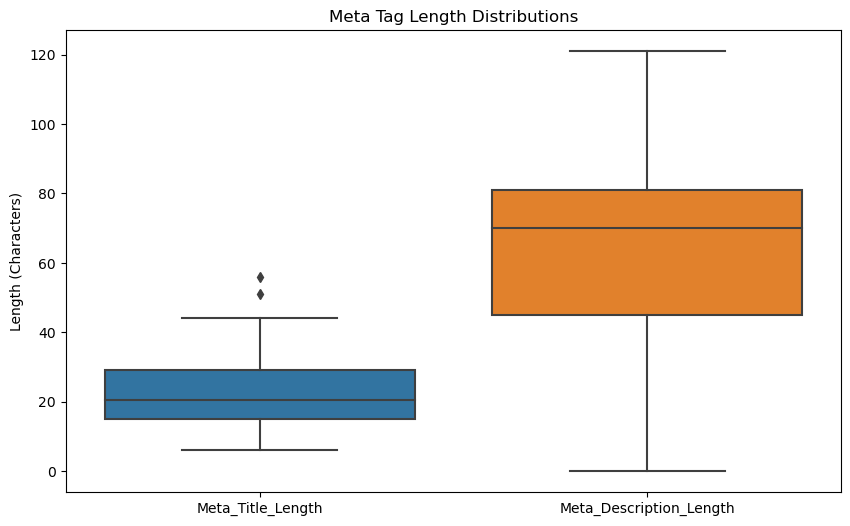

Meta Title Length Stats:
count    36.000000
mean     23.861111
std      12.382367
min       6.000000
25%      15.000000
50%      20.500000
75%      29.250000
max      56.000000
Name: Meta_Title_Length, dtype: float64

Meta Description Length Stats:
count     36.000000
mean      60.944444
std       30.072241
min        0.000000
25%       45.000000
50%       70.000000
75%       81.000000
max      121.000000
Name: Meta_Description_Length, dtype: float64


In [4]:
# Analyze and visualize meta tag lengths
plt.figure(figsize=(10, 6))
sns.boxplot(data=seo_dataframe[["Meta_Title_Length", "Meta_Description_Length"]])
plt.title("Meta Tag Length Distributions")
plt.xticks([0, 1], ["Meta_Title_Length", "Meta_Description_Length"])
plt.ylabel("Length (Characters)")
plt.show()

# Print basic statistics
print("Meta Title Length Stats:")
print(seo_dataframe["Meta_Title_Length"].describe())
print("\nMeta Description Length Stats:")
print(seo_dataframe["Meta_Description_Length"].describe())

## <ins>Step 4: Content Richness and Readability</ins>
Assess the richness and readability of the content by examining word counts, average sentence lengths, and other metrics.

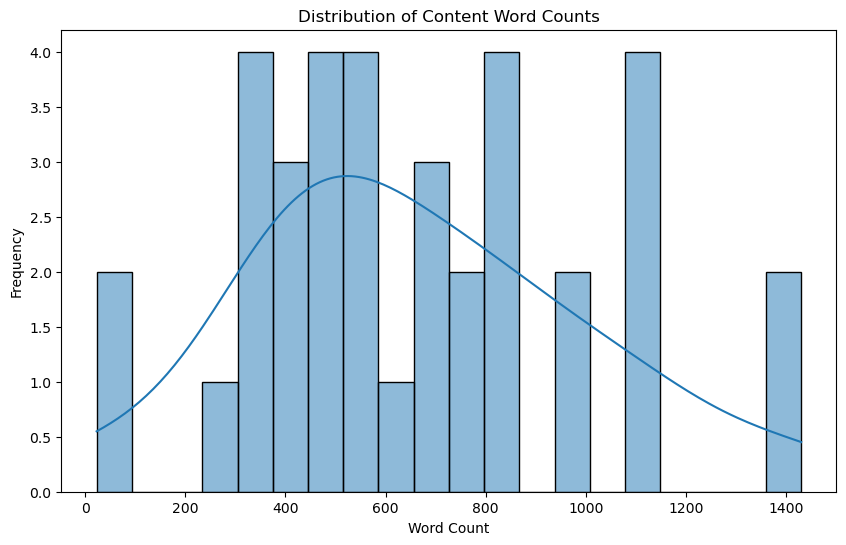

Content Word Count Stats:
count      36.000000
mean      661.500000
std       338.051011
min        23.000000
25%       417.250000
50%       577.500000
75%       836.500000
max      1430.000000
Name: Content_Word_Count, dtype: float64


In [5]:
# Add word count for content
seo_dataframe["Content_Word_Count"] = seo_dataframe["Content"].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Visualize content word counts
plt.figure(figsize=(10, 6))
sns.histplot(seo_dataframe["Content_Word_Count"], bins=20, kde=True)
plt.title("Distribution of Content Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# Print basic statistics for word counts
print("Content Word Count Stats:")
print(seo_dataframe["Content_Word_Count"].describe())

## <ins>Step 5: Identify SEO Trends and Gaps</ins>
Highlight the strengths and weaknesses in the SEO strategies employed by each website. This includes:
- Use of keywords in meta tags and content.
- Appropriateness of meta tag lengths.
- Richness and depth of content.

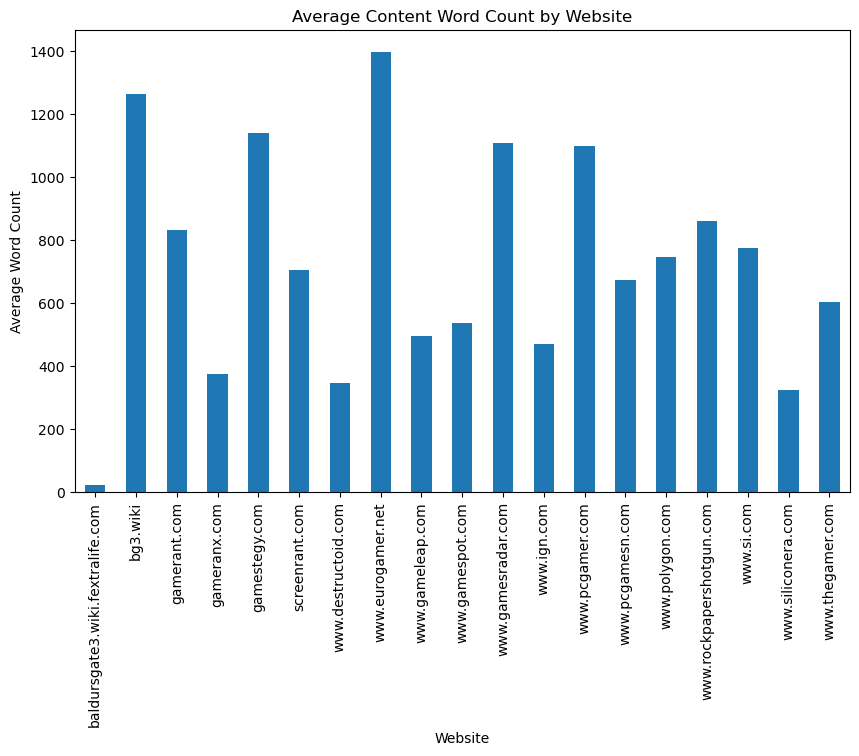

In [6]:
# Group by website and calculate average word counts
seo_dataframe["Website"] = seo_dataframe["URL"].apply(lambda x: x.split("/")[2])
avg_word_counts = seo_dataframe.groupby("Website")["Content_Word_Count"].mean()

# Visualize average word counts per website
avg_word_counts.plot(kind="bar", figsize=(10, 6), title="Average Content Word Count by Website", ylabel="Average Word Count")
plt.show()

## <ins>Step 6: Recommendations</ins>
Based on the analysis, provide actionable SEO recommendations. For example:
- Ensure meta titles are concise and include relevant keywords within 50–60 characters.
- Optimize meta descriptions with engaging and informative text between 150–160 characters.
- Focus on providing in-depth content with a word count of at least 1,000 words for guide articles.
- Avoid keyword stuffing while ensuring strategic keyword placement in headings and paragraphs.

## <ins>Step 7: Save Insights</ins>
Save the insights generated in this notebook for documentation or presentation purposes.

In [7]:
seo_dataframe.to_pickle("data/seo_insights.pkl")
seo_dataframe.to_csv("data/seo_insights.csv", index=False)
print("Saved SEO insights for documentation.")

Saved SEO insights for documentation.
